<a href="https://colab.research.google.com/github/nameetj3416/DeepLearning/blob/master/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [7]:
### Generating Data

In [121]:
X,Y= make_blobs(n_samples=500,centers=2,n_features=2,random_state=13)

In [106]:
print(X.shape,Y.shape)

(500, 2) (500,)


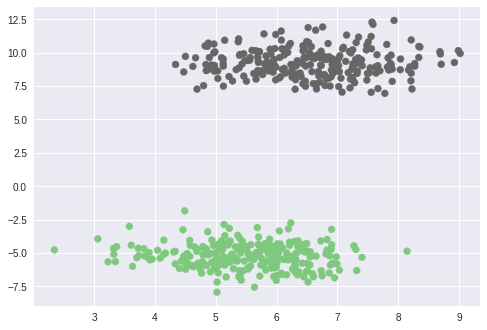

In [122]:
plt.style.use("seaborn")
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Accent)
plt.show()

In [20]:
### The Goal of the Perceptron is to make a binary-classifier.
### Model and helper functions:

In [111]:
def sigmoid(z):
  return 1/(1+np.exp(-z))

### Numpy arrays can also be passed to the above function.

In [108]:
### Implement perceptron Learning algorithm
#### Learn Weights
#### Reduce the Loss
#### Make the Predictions

In [112]:
def predict(X,weights):
  z=np.dot(X,weights) 
  return sigmoid(z)

def loss(X,Y,weights):
  """Binary Cross Entropy"""

  Yp=predict(X,weights)
  cost=np.mean(-Y*np.log(Yp)-(1-Y)*(np.log(1-Yp)))
  return cost

def update(X,Y,weights,learning_rate):
  """Performs Update for 1 epoch"""
  """X has m training examples with n features and y has outputs (or binary classes here) for all
     the m inputs. Therefore we would have n weights corresponding to each feature"""
  Yp=predict(X,weights)
  dw= np.dot(X.T,Yp-Y)
 
  ### X is m*n while y is m*1 therefore 
  m=X.shape[0]
  weights=weights-learning_rate*dw/(float(m))
  return weights
def train(X,Y,learning_rate=0.5,maxEpochs=100):
  #modify the input matrix to have the bias term

  ones=np.ones((X.shape[0],1))
  #Horizontal Stacking Method

  X=np.hstack((ones,X))

  #init weights 0

  weights=np.zeros(X.shape[1])


  for epoch in range(maxEpochs):

    weights=update(X,Y,weights,learning_rate)

    if epoch%10==0:
      l= loss(X,Y,weights)
      print("Epoch %d Loss %.4f" %(epoch,l))
  return weights



In [133]:
weights=train(X,Y,0.5,1200)

Epoch 0 Loss 0.0004
Epoch 10 Loss 0.0004
Epoch 20 Loss 0.0004
Epoch 30 Loss 0.0003
Epoch 40 Loss 0.0003
Epoch 50 Loss 0.0003
Epoch 60 Loss 0.0003
Epoch 70 Loss 0.0003
Epoch 80 Loss 0.0003
Epoch 90 Loss 0.0002
Epoch 100 Loss 0.0002
Epoch 110 Loss 0.0002
Epoch 120 Loss 0.0002
Epoch 130 Loss 0.0002
Epoch 140 Loss 0.0002
Epoch 150 Loss 0.0002
Epoch 160 Loss 0.0002
Epoch 170 Loss 0.0002
Epoch 180 Loss 0.0002
Epoch 190 Loss 0.0002
Epoch 200 Loss 0.0002
Epoch 210 Loss 0.0002
Epoch 220 Loss 0.0002
Epoch 230 Loss 0.0002
Epoch 240 Loss 0.0001
Epoch 250 Loss 0.0001
Epoch 260 Loss 0.0001
Epoch 270 Loss 0.0001
Epoch 280 Loss 0.0001
Epoch 290 Loss 0.0001
Epoch 300 Loss 0.0001
Epoch 310 Loss 0.0001
Epoch 320 Loss 0.0001
Epoch 330 Loss 0.0001
Epoch 340 Loss 0.0001
Epoch 350 Loss 0.0001
Epoch 360 Loss 0.0001
Epoch 370 Loss 0.0001
Epoch 380 Loss 0.0001
Epoch 390 Loss 0.0001
Epoch 400 Loss 0.0001
Epoch 410 Loss 0.0001
Epoch 420 Loss 0.0001
Epoch 430 Loss 0.0001
Epoch 440 Loss 0.0001
Epoch 450 Loss 0.0001

In [124]:
###Make Predictions
###Make Decision Surface
#### Linear vs Non-Linear Classification

In [148]:
def getPredictions(X_test,weights,labels):
  if X_test.shape[1]!=weights.shape[0]:
    X_test=np.hstack((np.ones((X_test.shape[0],1)),X_test))
  
  probs=predict(X_test,weights)

  if not labels:
    return probs
  else:
    labels=np.zeros(probs.shape) 
    labels[probs>=0.5]=1
    return labels


In [134]:
print(weights)

[-0.06408509 -0.19239764  2.00488591]


In [131]:
x1=np.linspace(2,10,10)
x2=-(weights[0]+weights[1]*x1)/weights[2]

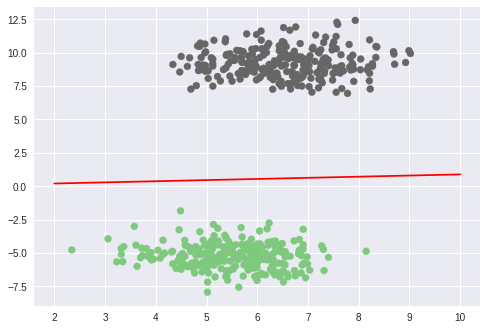

In [135]:
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Accent)
plt.plot(x1,x2,c='red')
plt.show() 

In [151]:
Yp=getPredictions(X,weights,labels=True)
training_acc=np.sum(Yp==Y)/Y.shape[0]
print(training_acc)


1.0
